In [160]:
# Load thu vien
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt

In [161]:
# Load data
df = pd.read_csv("data_s2.csv")
df.head()

,BRANCH_ID,CHANNEL_ID,AMOUNT,TRAN_TYPE,TRAN_TIME
0,BR0001,MOBILE,3020080,BOOKING ORDER,12/01/2019 1:11
1,BR0002,ATM,2001100,CASH TRANSACTIONS,12/01/2019 11:01
2,BR0004,MOBILE,2140140,BOOKING ORDER,12/01/2019 1:11
3,BR0002,INTERNET,4293000,FINANCIAL POSTING,12/01/2019 6:50
4,BR0003,MOBILE,3046430,BOOKING ORDER,12/01/2019 1:11


In [162]:
df.info

<bound method DataFrame.info of     BRANCH_ID CHANNEL_ID   AMOUNT          TRAN_TYPE         TRAN_TIME
0      BR0001     MOBILE  3020080      BOOKING ORDER   12/01/2019 1:11
1      BR0002        ATM  2001100  CASH TRANSACTIONS  12/01/2019 11:01
2      BR0004     MOBILE  2140140      BOOKING ORDER   12/01/2019 1:11
3      BR0002   INTERNET  4293000  FINANCIAL POSTING   12/01/2019 6:50
4      BR0003     MOBILE  3046430      BOOKING ORDER   12/01/2019 1:11
..        ...        ...      ...                ...               ...
495    BR0050        ATM   200000  CASH TRANSACTIONS   12/01/2019 8:45
496    BR0002     MOBILE   100000  FINANCIAL POSTING  11/04/2019 21:13
497    BR0002     MOBILE  6259900  FINANCIAL POSTING  12/01/2019 10:53
498    BR0002   INTERNET    10000  FINANCIAL POSTING   12/01/2019 8:58
499    BR0002   INTERNET    25000  FINANCIAL POSTING   12/01/2019 9:13

[500 rows x 5 columns]>

In [163]:
df.describe()

,AMOUNT
count,5.000000e+02
mean,3.529194e+06
std,1.602360e+07
min,-2.000000e+06
25%,7.883650e+04
50%,1.002200e+06
75%,3.000000e+06
max,3.000000e+08


In [164]:
len(df)

500

In [165]:
df.isna()

,BRANCH_ID,CHANNEL_ID,AMOUNT,TRAN_TYPE,TRAN_TIME
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
495,False,False,False,False,False
496,False,False,False,False,False
497,False,False,False,False,False
498,False,False,False,False,False


In [166]:
# Tien xu ly du lieu
print(df['TRAN_TIME'].dtypes)

object


In [167]:
# Convert to datatime 
df["TRAN_TIME"] = pd.to_datetime(df["TRAN_TIME"], format=("%d/%m/%Y %H:%M"))
df["TRAN_TIME"]

0     2019-01-12 01:11:00
1     2019-01-12 11:01:00
2     2019-01-12 01:11:00
3     2019-01-12 06:50:00
4     2019-01-12 01:11:00
              ...        
495   2019-01-12 08:45:00
496   2019-04-11 21:13:00
497   2019-01-12 10:53:00
498   2019-01-12 08:58:00
499   2019-01-12 09:13:00
Name: TRAN_TIME, Length: 500, dtype: datetime64[ns]

In [168]:
print(df["AMOUNT"].dtypes)

int64


In [169]:
df.head()

,BRANCH_ID,CHANNEL_ID,AMOUNT,TRAN_TYPE,TRAN_TIME
0,BR0001,MOBILE,3020080,BOOKING ORDER,2019-01-12 01:11:00
1,BR0002,ATM,2001100,CASH TRANSACTIONS,2019-01-12 11:01:00
2,BR0004,MOBILE,2140140,BOOKING ORDER,2019-01-12 01:11:00
3,BR0002,INTERNET,4293000,FINANCIAL POSTING,2019-01-12 06:50:00
4,BR0003,MOBILE,3046430,BOOKING ORDER,2019-01-12 01:11:00


In [170]:
# Kiem tra tinh dung dan cua du lieu 
df["AMOUNT"].describe()

count    5.000000e+02
mean     3.529194e+06
std      1.602360e+07
min     -2.000000e+06
25%      7.883650e+04
50%      1.002200e+06
75%      3.000000e+06
max      3.000000e+08
Name: AMOUNT, dtype: float64

In [171]:
# Amount > 0 
mask = df["AMOUNT"] > 0

In [172]:
df = df[mask]
df.head()

,BRANCH_ID,CHANNEL_ID,AMOUNT,TRAN_TYPE,TRAN_TIME
0,BR0001,MOBILE,3020080,BOOKING ORDER,2019-01-12 01:11:00
1,BR0002,ATM,2001100,CASH TRANSACTIONS,2019-01-12 11:01:00
2,BR0004,MOBILE,2140140,BOOKING ORDER,2019-01-12 01:11:00
3,BR0002,INTERNET,4293000,FINANCIAL POSTING,2019-01-12 06:50:00
4,BR0003,MOBILE,3046430,BOOKING ORDER,2019-01-12 01:11:00


In [173]:
df["AMOUNT"].describe()

count    4.980000e+02
mean     3.547383e+06
std      1.605310e+07
min      1.000000e+01
25%      8.418000e+04
50%      1.006600e+06
75%      3.000000e+06
max      3.000000e+08
Name: AMOUNT, dtype: float64

In [174]:
len(df)

498

In [175]:
df.to_csv("data_processed.csv")

In [176]:
# Tao ra cac cot du lieu moi 
# TRAN_HOUR 
df["TRAN_HOUR"] = df["TRAN_TIME"].dt.hour

<ipython-input-176-235bdf90f4a1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["TRAN_HOUR"] = df["TRAN_TIME"].dt.hour


In [177]:
df.head()

,BRANCH_ID,CHANNEL_ID,AMOUNT,TRAN_TYPE,TRAN_TIME,TRAN_HOUR
0,BR0001,MOBILE,3020080,BOOKING ORDER,2019-01-12 01:11:00,1
1,BR0002,ATM,2001100,CASH TRANSACTIONS,2019-01-12 11:01:00,11
2,BR0004,MOBILE,2140140,BOOKING ORDER,2019-01-12 01:11:00,1
3,BR0002,INTERNET,4293000,FINANCIAL POSTING,2019-01-12 06:50:00,6
4,BR0003,MOBILE,3046430,BOOKING ORDER,2019-01-12 01:11:00,1


In [178]:
# Phan tich du lieu va bieu dien du lieu
# Groupby theo channel xem so luong giao dich qua cac kenh channel
sum_channel = df.groupby(df["CHANNEL_ID"]).count()["AMOUNT"].reset_index(name="ABC")

In [179]:
sum_channel

,CHANNEL_ID,ABC
0,ATM,98
1,INTERNET,72
2,MOBILE,328


In [180]:
df_plot = sum_channel
df_plot = df_plot.set_index("CHANNEL_ID")
df_plot

,ABC
CHANNEL_ID,
ATM,98
INTERNET,72
MOBILE,328


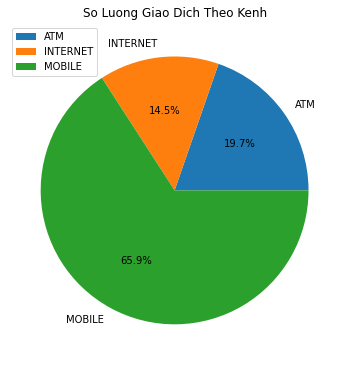

In [181]:
plot = df_plot.plot.pie(y="ABC",  autopct='%1.1f%%', subplots = True, figsize=(6, 8))
plt.title("So Luong Giao Dich Theo Kenh")
plt.ylabel("")
plt.show()

In [182]:
# Doanh thu theo kenh
profit_channel = df.groupby("CHANNEL_ID").sum()["AMOUNT"].reset_index(name  = "PROFIT_CHANNEL")
profit_channel = profit_channel.set_index("CHANNEL_ID")
profit_channel

,PROFIT_CHANNEL
CHANNEL_ID,
ATM,179502250
INTERNET,768629241
MOBILE,818465352


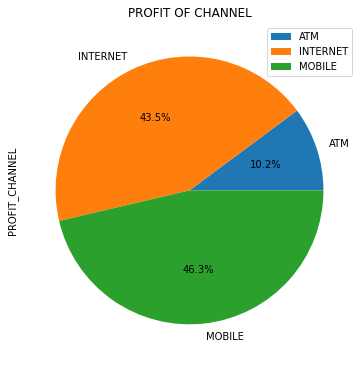

In [183]:
plot = profit_channel.plot.pie(y="PROFIT_CHANNEL", autopct = "%1.1f%%", subplots=True, figsize = (6, 10))
plt.title("PROFIT OF CHANNEL")
plt.show()

In [184]:
df_plot2 = profit_channel.merge(sum_channel, on="CHANNEL_ID")
df_plot2

,CHANNEL_ID,PROFIT_CHANNEL,ABC
0,ATM,179502250,98
1,INTERNET,768629241,72
2,MOBILE,818465352,328


In [185]:
df_plot2["%_ABC"] = df_plot2["ABC"]*100/(df_plot2["ABC"].max())
df_plot2["%_PROFIT_CHANNEL"] = df_plot2["PROFIT_CHANNEL"]*100/(df_plot2["PROFIT_CHANNEL"].max())
df_plot2 = df_plot2.set_index("CHANNEL_ID")
df_plot2

,PROFIT_CHANNEL,ABC,%_ABC,%_PROFIT_CHANNEL
CHANNEL_ID,,,,
ATM,179502250,98,29.878049,21.931564
INTERNET,768629241,72,21.951220,93.911030
MOBILE,818465352,328,100.000000,100.000000


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

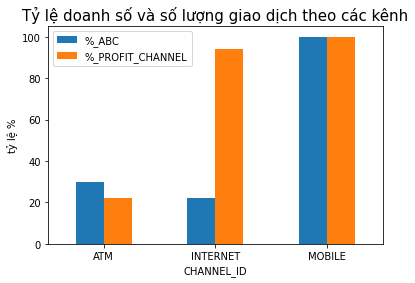

In [186]:
df_plot2.plot.bar( y=["%_ABC",'%_PROFIT_CHANNEL'])
plt.title("Tỷ lệ doanh số và số lượng giao dịch theo các kênh", fontsize=15)
plt.ylabel('tỷ lệ %')
plt.xticks(rotation=0)

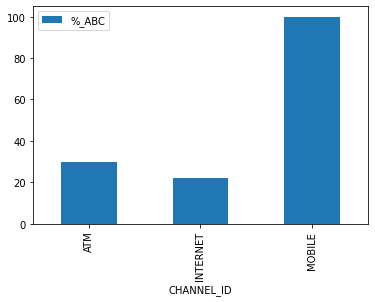

In [187]:
df_plot2.plot.bar(y=["%_ABC"])

89


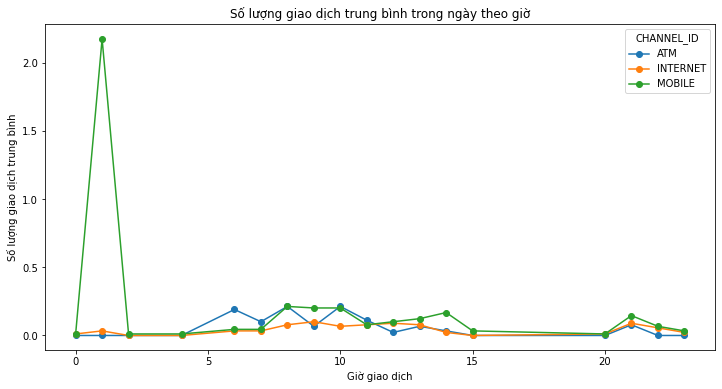

In [188]:
# 9. VE BIEU DO LUU LUONG GIAO DICH CÁC KENH TRUNG BINH THEO GIO MOI NGAY
# Tính số ngày trong dữ liệu
number_of_days = (df['TRAN_TIME'].max().date() - df['TRAN_TIME'].min().date()).days
print(number_of_days)
 
# Trích ra 2 cột kênh và giờ
df = df[['CHANNEL_ID', 'TRAN_HOUR']]

# Group và tính số lượng từng kênh trong từng giờ
count_by_CNNTime = df.groupby(['CHANNEL_ID','TRAN_HOUR']).size().reset_index(name='COUNTS_CNNTIME')


# Áp dung pivot table để xoay dữ liệu
df_plot3 = pd.pivot_table(count_by_CNNTime, values='COUNTS_CNNTIME', index=['TRAN_HOUR'], columns=['CHANNEL_ID'])

# Xử lý NaN
df_plot3['ATM'] = df_plot3['ATM'].fillna(0)
df_plot3['INTERNET'] = df_plot3['INTERNET'].fillna(0)
df_plot3['MOBILE'] = df_plot3['MOBILE'].fillna(0)

# Tính giá trị trung bình theo ngày
df_plot3['ATM']  = df_plot3['ATM'] / number_of_days
df_plot3['INTERNET'] = df_plot3['INTERNET'] / number_of_days
df_plot3['MOBILE'] = df_plot3['MOBILE'] / number_of_days

# Vẽ biểu đồ
df_plot3.plot(y=['ATM', 'INTERNET', 'MOBILE'], figsize=(12, 6),marker='o')
plt.title('Số lượng giao dịch trung bình trong ngày theo giờ')
plt.ylabel('Số lượng giao dịch trung bình')
plt.xlabel('Giờ giao dịch')
 
plt.show()

In [190]:
count_by_CNNTime

,CHANNEL_ID,TRAN_HOUR,COUNTS_CNNTIME
0,ATM,6,17
1,ATM,7,9
2,ATM,8,19
3,ATM,9,6
4,ATM,10,19
5,ATM,11,10
6,ATM,12,2
7,ATM,13,6
8,ATM,14,3
9,ATM,21,7


In [191]:
df_plot3

CHANNEL_ID,ATM,INTERNET,MOBILE
TRAN_HOUR,,,
0,0.000000,0.011236,0.011236
1,0.000000,0.033708,2.179775
2,0.000000,0.000000,0.011236
4,0.000000,0.000000,0.011236
6,0.191011,0.033708,0.044944
7,0.101124,0.033708,0.044944
8,0.213483,0.078652,0.213483
9,0.067416,0.101124,0.202247
10,0.213483,0.067416,0.202247


In [192]:
# importing datetime module
import datetime
 
# assigned unix time
unix_time = 1627334400
 
date_time = datetime.datetime.fromtimestamp(unix_time)
 
# print unix time stamp
print("Unix_Time =>",unix_time)
 
# displaying date and time in a regular
# string format
print("Date & Time =>" ,
      date_time.strftime('%Y-%m-%d %H:%M:%S'))

Unix_Time => 1627334400
Date & Time => 2021-07-27 04:20:00
